# Capstone Project
This is the IBM data science capstone project <br>
we will use location data

In [1182]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [3]:
import requests 
import pandas as pd 
import numpy as np
import random 


!pip install geopy
from geopy.geocoders import Nominatim 


from IPython.display import Image 
from IPython.core.display import HTML 

from pandas.io.json import json_normalize


! pip install folium==0.5.0
import folium

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [179]:
CLIENT_ID = 'SRCMSC5JQ35QCVDCCK4IKKB1ALW3NVBDGASRH3DQOM0LERBX'
CLIENT_SECRET = 'KWFZACWWH2AOZTVPXPN4YZ4APXO0JNYOOSOH0F4FFIZP1WIS' 
ACCESS_TOKEN = 'KEL0PP30CQBOUGQPPSBVU22PUR2NF3YL3VEQV3LXAXFB51I1'
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: SRCMSC5JQ35QCVDCCK4IKKB1ALW3NVBDGASRH3DQOM0LERBX
CLIENT_SECRET:KWFZACWWH2AOZTVPXPN4YZ4APXO0JNYOOSOH0F4FFIZP1WIS


In [325]:
address = '1100 Congress Ave, Austin, TX'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

30.276485 -97.739768


In [326]:
search_query = 'used car dealer'
radius =50000
print("We will search for all the "+ search_query + " within " + str(radius/1609.4) + " miles")

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
url

We will search for all the used car dealer within 31.06747856343979 miles


'https://api.foursquare.com/v2/venues/search?client_id=SRCMSC5JQ35QCVDCCK4IKKB1ALW3NVBDGASRH3DQOM0LERBX&client_secret=KWFZACWWH2AOZTVPXPN4YZ4APXO0JNYOOSOH0F4FFIZP1WIS&ll=30.276485,-97.739768&oauth_token=KEL0PP30CQBOUGQPPSBVU22PUR2NF3YL3VEQV3LXAXFB51I1&v=20180604&query=used car dealer&radius=50000&limit=30'

In [327]:
result = requests.get(url).json()
venues = result['response']['venues']
dataframe = json_normalize(venues)
dataframe.head(10)


/Users/zhangmengxuan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet,venuePage.id
0,594170c7d8096e11915b4420,Used Car Dealers Austin,"[{'id': '4eb1c1623b7b52c0e1adc2ec', 'name': 'A...",v-1610837510,False,6825 E Highway 290 #B,30.320618,-97.688241,"[{'label': 'display', 'lat': 30.32061846838949...",6975,78723,US,Austin,TX,United States,"[6825 E Highway 290 #B, Austin, TX 78723]",NaN,NaN
1,50d5dfec011cafac8c44278f,Used Cars Dealer,"[{'id': '4eb1c1623b7b52c0e1adc2ec', 'name': 'A...",v-1610837510,False,Third Coast Auto Group 1930 Kyle Crossing,30.016762,-97.859177,"[{'label': 'display', 'lat': 30.01676177978515...",31113,78640,US,Kyle,TX,United States,"[Third Coast Auto Group 1930 Kyle Crossing, Ky...",NaN,NaN
2,5376220c11d2e19aeb53f7f7,SPECIALTY Pflugerville Used Cars Dealership,"[{'id': '4eb1c1623b7b52c0e1adc2ec', 'name': 'A...",v-1610837510,False,15505 Interstate 35,30.449940,-97.666000,"[{'label': 'display', 'lat': 30.44993972778320...",20567,78660,US,Pflugerville,TX,United States,"[15505 Interstate 35, Pflugerville, TX 78660]",NaN,NaN
3,4f1a4046d5fba9ec6d28c4ec,Used Cars Austin Texas,"[{'id': '4bf58dd8d48988d124941735', 'name': 'O...",v-1610837510,False,5410 Airport Blvd,30.316262,-97.714484,"[{'label': 'display', 'lat': 30.316262, 'lng':...",5050,78751,US,Austin,TX,United States,"[5410 Airport Blvd, Austin, TX 78751]",NaN,NaN
4,5bec739086f4cc1d3a1b8f0b,Travis Used Cars,"[{'id': '4eb1c1623b7b52c0e1adc2ec', 'name': 'A...",v-1610837510,False,6114 E Riverside Dr,30.226184,-97.704906,"[{'label': 'display', 'lat': 30.22618400000000...",6526,78741,US,Austin,TX,United States,"[6114 E Riverside Dr (Brassie St), Austin, TX ...",Brassie St,NaN
5,4f510bcae4b0d16b30603f99,Sketchy's Car Dealership,"[{'id': '4eb1c1623b7b52c0e1adc2ec', 'name': 'A...",v-1610837510,False,701 Montopolis Dr,30.237165,-97.695183,"[{'label': 'entrance', 'lat': 30.237285, 'lng'...",6126,78741,US,Austin,TX,United States,"[701 Montopolis Dr (Ponca), Austin, TX 78741]",Ponca,NaN
6,57d2562f498e55c54b3f41fe,Austin Used Cars,"[{'id': '4eb1c1623b7b52c0e1adc2ec', 'name': 'A...",v-1610837510,False,4430 Manchaca Rd,30.228870,-97.789641,"[{'label': 'display', 'lat': 30.22887, 'lng': ...",7147,78745,US,Austin,TX,United States,"[4430 Manchaca Rd, Austin, TX 78745]",NaN,NaN
7,515a9e04067d46d012a6295e,Sell My Used Car,"[{'id': '4bf58dd8d48988d124951735', 'name': 'A...",v-1610837510,False,12312 Blue Water Dr,30.405955,-97.682195,"[{'label': 'display', 'lat': 30.405955, 'lng':...",15437,78758,US,Austin,TX,United States,"[12312 Blue Water Dr, Austin, TX 78758]",NaN,NaN
8,512e3264d86c77871f66a9e8,Austin Used Cars North Lamar Austin,"[{'id': '4eb1c1623b7b52c0e1adc2ec', 'name': 'A...",v-1610837510,False,10625 N Lamar Blvd,30.375484,-97.689438,"[{'label': 'display', 'lat': 30.37548446655273...",12034,78753,US,Austin,TX,United States,"[10625 N Lamar Blvd, Austin, TX 78753]",NaN,NaN
9,5b2a808186bc49002c88a74d,autonation used cars,"[{'id': '4eb1c1623b7b52c0e1adc2ec', 'name': 'A...",v-1610837510,False,NaN,30.410687,-97.746155,"[{'label': 'display', 'lat': 30.410687, 'lng':...",14951,78759,US,Austin,TX,United States,"[Austin, TX 78759]",NaN,NaN


In [328]:
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

In [329]:
dataframe_filtered

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,id
0,Used Car Dealers Austin,"[{'id': '4eb1c1623b7b52c0e1adc2ec', 'name': 'A...",6825 E Highway 290 #B,30.320618,-97.688241,"[{'label': 'display', 'lat': 30.32061846838949...",6975,78723,US,Austin,TX,United States,"[6825 E Highway 290 #B, Austin, TX 78723]",NaN,594170c7d8096e11915b4420
1,Used Cars Dealer,"[{'id': '4eb1c1623b7b52c0e1adc2ec', 'name': 'A...",Third Coast Auto Group 1930 Kyle Crossing,30.016762,-97.859177,"[{'label': 'display', 'lat': 30.01676177978515...",31113,78640,US,Kyle,TX,United States,"[Third Coast Auto Group 1930 Kyle Crossing, Ky...",NaN,50d5dfec011cafac8c44278f
2,SPECIALTY Pflugerville Used Cars Dealership,"[{'id': '4eb1c1623b7b52c0e1adc2ec', 'name': 'A...",15505 Interstate 35,30.449940,-97.666000,"[{'label': 'display', 'lat': 30.44993972778320...",20567,78660,US,Pflugerville,TX,United States,"[15505 Interstate 35, Pflugerville, TX 78660]",NaN,5376220c11d2e19aeb53f7f7
3,Used Cars Austin Texas,"[{'id': '4bf58dd8d48988d124941735', 'name': 'O...",5410 Airport Blvd,30.316262,-97.714484,"[{'label': 'display', 'lat': 30.316262, 'lng':...",5050,78751,US,Austin,TX,United States,"[5410 Airport Blvd, Austin, TX 78751]",NaN,4f1a4046d5fba9ec6d28c4ec
4,Travis Used Cars,"[{'id': '4eb1c1623b7b52c0e1adc2ec', 'name': 'A...",6114 E Riverside Dr,30.226184,-97.704906,"[{'label': 'display', 'lat': 30.22618400000000...",6526,78741,US,Austin,TX,United States,"[6114 E Riverside Dr (Brassie St), Austin, TX ...",Brassie St,5bec739086f4cc1d3a1b8f0b
5,Sketchy's Car Dealership,"[{'id': '4eb1c1623b7b52c0e1adc2ec', 'name': 'A...",701 Montopolis Dr,30.237165,-97.695183,"[{'label': 'entrance', 'lat': 30.237285, 'lng'...",6126,78741,US,Austin,TX,United States,"[701 Montopolis Dr (Ponca), Austin, TX 78741]",Ponca,4f510bcae4b0d16b30603f99
6,Austin Used Cars,"[{'id': '4eb1c1623b7b52c0e1adc2ec', 'name': 'A...",4430 Manchaca Rd,30.228870,-97.789641,"[{'label': 'display', 'lat': 30.22887, 'lng': ...",7147,78745,US,Austin,TX,United States,"[4430 Manchaca Rd, Austin, TX 78745]",NaN,57d2562f498e55c54b3f41fe
7,Sell My Used Car,"[{'id': '4bf58dd8d48988d124951735', 'name': 'A...",12312 Blue Water Dr,30.405955,-97.682195,"[{'label': 'display', 'lat': 30.405955, 'lng':...",15437,78758,US,Austin,TX,United States,"[12312 Blue Water Dr, Austin, TX 78758]",NaN,515a9e04067d46d012a6295e
8,Austin Used Cars North Lamar Austin,"[{'id': '4eb1c1623b7b52c0e1adc2ec', 'name': 'A...",10625 N Lamar Blvd,30.375484,-97.689438,"[{'label': 'display', 'lat': 30.37548446655273...",12034,78753,US,Austin,TX,United States,"[10625 N Lamar Blvd, Austin, TX 78753]",NaN,512e3264d86c77871f66a9e8
9,autonation used cars,"[{'id': '4eb1c1623b7b52c0e1adc2ec', 'name': 'A...",NaN,30.410687,-97.746155,"[{'label': 'display', 'lat': 30.410687, 'lng':...",14951,78759,US,Austin,TX,United States,"[Austin, TX 78759]",NaN,5b2a808186bc49002c88a74d


In [330]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13)

label = folium.Popup(address, parse_html=True)
folium.CircleMarker(
    [latitude, longitude],
    radius=5,
    color='red',
    popup=label,
    fill = True,
    fill_color='red',
    fill_opacity=0.6
).add_to(venues_map)
    
for lat, lng, name in zip(dataframe_filtered.lat, dataframe_filtered.lng,dataframe_filtered.name):
    label = folium.Popup(name, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)
venues_map

In [331]:
print('{} car dealers were returned by Foursquare.'.format(dataframe_filtered.shape[0]))

15 car dealers were returned by Foursquare.


In [318]:
car = pd.read_csv("vehicles.csv")
car['posting_date'] = pd.to_datetime(car['posting_date'])
car.head()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,...,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02 08:11:30-06:00
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02 02:11:50-06:00
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,...,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01 19:50:41-06:00
3,3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,...,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01 15:54:45-06:00
4,4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,...,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01 12:53:56-06:00


In [332]:
len(car['state'].unique())

51

In [355]:
TxCar = car.query('state == "tx"').copy().reset_index(drop=True)

TxCar.head(20)

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,369887,7240794606,https://abilene.craigslist.org/cto/d/abilene-2...,abilene,https://abilene.craigslist.org,3800,2007.0,pontiac,g6,good,...,fwd,NaN,NaN,NaN,https://images.craigslist.org/01616_6GOIRSxzYi...,"2007 Pontiac G6 with only 71,000 miles. V6, 3....",tx,32.401556,-99.884713,2020-12-02 20:01:28-06:00
1,369888,7240784041,https://abilene.craigslist.org/cto/d/abilene-2...,abilene,https://abilene.craigslist.org,5200,2013.0,dodge,avenger sxt,excellent,...,NaN,NaN,NaN,blue,https://images.craigslist.org/00P0P_byNC9Jkr1H...,"2013 Dodge Avenger SXT with only 63,000 miles....",tx,32.401556,-99.884713,2020-12-02 19:35:01-06:00
2,369889,7240736610,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,2895,2007.0,mazda,3 i,fair,...,fwd,compact,sedan,red,https://images.craigslist.org/01414_dTKjpyr8O2...,Good transportation for a reasonable price. A ...,tx,32.427170,-99.738643,2020-12-02 17:48:14-06:00
3,369890,7240733664,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,8100,2013.0,honda,civic,good,...,fwd,NaN,coupe,brown,https://images.craigslist.org/00p0p_5RwjDjzLN6...,Sporty metallic brown 2013 Honda civic 2dr lx ...,tx,32.427170,-99.738643,2020-12-02 17:42:14-06:00
4,369891,7240681437,https://abilene.craigslist.org/ctd/d/liberty-h...,abilene,https://abilene.craigslist.org,16995,2001.0,ford,f-350 4x4 lariat diesel,NaN,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/00d0d_25F6ovCjQl...,CALL OR TEXT 512-914-8066 www.GETADIESEL.com ...,tx,30.663000,-97.931600,2020-12-02 16:06:36-06:00
5,369892,7240643132,https://abilene.craigslist.org/cto/d/abilene-2...,abilene,https://abilene.craigslist.org,5500,2003.0,toyota,highlander,good,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/00h0h_kQ3dhnStla...,"2003 Toyota Highlander with 186,2XX miles for ...",tx,32.474179,-99.762855,2020-12-02 15:05:54-06:00
6,369893,7240634469,https://abilene.craigslist.org/ctd/d/liberty-h...,abilene,https://abilene.craigslist.org,29999,2013.0,gmc,sierra 2500hd 4x4 denali,NaN,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/00G0G_8sLLYcS2QH...,CALL OR TEXT 512-914-8066 www.GETADIESEL.com ...,tx,30.663000,-97.931600,2020-12-02 14:52:12-06:00
7,369894,7240540433,https://abilene.craigslist.org/cto/d/abilene-g...,abilene,https://abilene.craigslist.org,15000,2009.0,gmc,sierra 2500 hd,excellent,...,rwd,full-size,truck,grey,https://images.craigslist.org/00x0x_bLuYqgwppp...,2009 GMC 2500 HD regular cab pickup. Has gas ...,tx,32.339483,-99.669829,2020-12-02 12:30:57-06:00
8,369895,7240531048,https://abilene.craigslist.org/cto/d/snyder-20...,abilene,https://abilene.craigslist.org,3500,2003.0,ford,ranger,NaN,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/00O0O_ep4XD66UsX...,2003 Ford Ranger · Truck · 155.000 millas Tru...,tx,32.745100,-100.917500,2020-12-02 12:16:48-06:00
9,369896,7240245280,https://abilene.craigslist.org/cto/d/abilene-2...,abilene,https://abilene.craigslist.org,34900,2018.0,ford,f-150,NaN,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/00x0x_c9yYF2OuVg...,"2018 Ford F-150 Crew Cab FX4 43,000 miles Gril...",tx,32.339483,-99.669829,2020-12-01 20:47:36-06:00


### Create a dataframe and combine it with loaction data

In [334]:
column_names = ['model','latitude', 'longitude'] 
car_location = pd.DataFrame(columns=column_names)
TxCar = TxCar[['manufacturer','model','lat','long']]
TxCarData =TxCar.dropna()

In [335]:
for i in TxCar.index:
    model = str(TxCar['manufacturer'][i]) +" "+ str(TxCar['model'][i])
    latitude =TxCar['lat'][i]
    longitude = TxCar['long'][i]
        
    car_location = car_location.append({ 'model':model,'latitude':latitude, 'longitude' :longitude},
                       ignore_index=True)

In [336]:
column_names = ['name','address','lat', 'long','Model','latitude', 'longitude'] 
venues_car_location = pd.DataFrame(columns=column_names)
car_location.dropna()

,model,latitude,longitude
0,pontiac g6,32.401556,-99.884713
1,dodge avenger sxt,32.401556,-99.884713
2,mazda 3 i,32.427170,-99.738643
3,honda civic,32.427170,-99.738643
4,ford f-350 4x4 lariat diesel,30.663000,-97.931600
...,...,...,...
24851,hyundai santa fe,35.199000,-97.484100
24852,lexus gs,34.197090,-97.160560
24853,jeep gladiator sport pickup 4d 5,33.890000,-98.510000
24854,toyota tundra double cab sr5,33.890000,-98.510000


### find the used cars with 5 mile of the dealer, geopy.distance will be imported

In [337]:
import geopy.distance

for i in dataframe_filtered.index:
    name = dataframe_filtered['name'][i]
    add = dataframe_filtered['address'][i]
    lat = dataframe_filtered['lat'][i]
    long = dataframe_filtered['lng'][i]
    coords_1 = (lat, long)
    print(coords_1)
    for n in car_location.index:
        latitude = car_location['latitude'][n]
        longitude = car_location['longitude'][n]
        model = str(car_location['model'][n].split()[0] + ' '+ car_location['model'][n].split()[1]).upper()
        coords_2 = (latitude, longitude)
        try:
            dis = geopy.distance.geodesic(coords_1, coords_2).miles
        except:
            continue
        if dis <=5:
            venues_car_location = venues_car_location.append({ 'name':name, 'address': address,
                                                              'lat':lat, 'long':long,
                                                              'Model':model,'latitude':latitude, 'longitude' :longitude},
                                                             ignore_index=True)
            
        
        
    

(30.320618468389497, -97.68824100494385)
(30.016761779785156, -97.85917663574219)
(30.449939727783203, -97.66600036621094)
(30.316262, -97.714484)
(30.226184000000003, -97.70490600000001)
(30.237165451049805, -97.69518280029297)
(30.22887, -97.789641)
(30.405955, -97.682195)
(30.375484466552734, -97.68943786621094)
(30.410687, -97.746155)
(30.454008102416992, -97.66765594482422)
(30.488352000000003, -97.674789)
(30.53425, -97.83639)
(29.824278215227014, -97.99095593624355)
(29.861253, -97.949226)


In [338]:
venues_car_location

,name,address,lat,long,Model,latitude,longitude
0,Used Car Dealers Austin,"1100 Congress Ave, Austin, TX",30.320618,-97.688241,SUBARU FORESTER,30.294913,-97.698755
1,Used Car Dealers Austin,"1100 Congress Ave, Austin, TX",30.320618,-97.688241,CHEVROLET TAHOE,30.313479,-97.698669
2,Used Car Dealers Austin,"1100 Congress Ave, Austin, TX",30.320618,-97.688241,SUBARU WRX,30.376400,-97.707800
3,Used Car Dealers Austin,"1100 Congress Ave, Austin, TX",30.320618,-97.688241,BUICK SKYLARK,30.331600,-97.700400
4,Used Car Dealers Austin,"1100 Congress Ave, Austin, TX",30.320618,-97.688241,JEEP GRAND,30.343200,-97.738975
...,...,...,...,...,...,...,...
6482,Dealer Alternative Auto Care,"1100 Congress Ave, Austin, TX",29.861253,-97.949226,NISSAN SENTRA,29.876470,-97.930258
6483,Dealer Alternative Auto Care,"1100 Congress Ave, Austin, TX",29.861253,-97.949226,RAM 1500,29.880000,-97.920000
6484,Dealer Alternative Auto Care,"1100 Congress Ave, Austin, TX",29.861253,-97.949226,NAN TOYTA,29.891942,-97.958530
6485,Dealer Alternative Auto Care,"1100 Congress Ave, Austin, TX",29.861253,-97.949226,CHEVROLET SILVERADO,29.880000,-97.920000


In [1171]:
table=venues_car_location.groupby('name').count()

column_names = ['Used Car Dealers','# of models'] 
group_dealer = pd.DataFrame(columns=column_names)
group_dealer['Used Car Dealers']= list(table.index) 
group_dealer['# of models']= list(table['lat'])
group_dealer

,Used Car Dealers,# of models
0,Austin Used Cars,804
1,Austin Used Cars North Lamar Austin,565
2,Caribbean Auto Dealer,330
3,Dealer Alternative Auto Care,127
4,DriveTime Used Cars,345
5,La Casita Used Cars,53
6,SPECIALTY Pflugerville Used Cars Dealership,294
7,Sell My Used Car,442
8,Sketchy's Car Dealership,540
9,Travis Used Cars,547


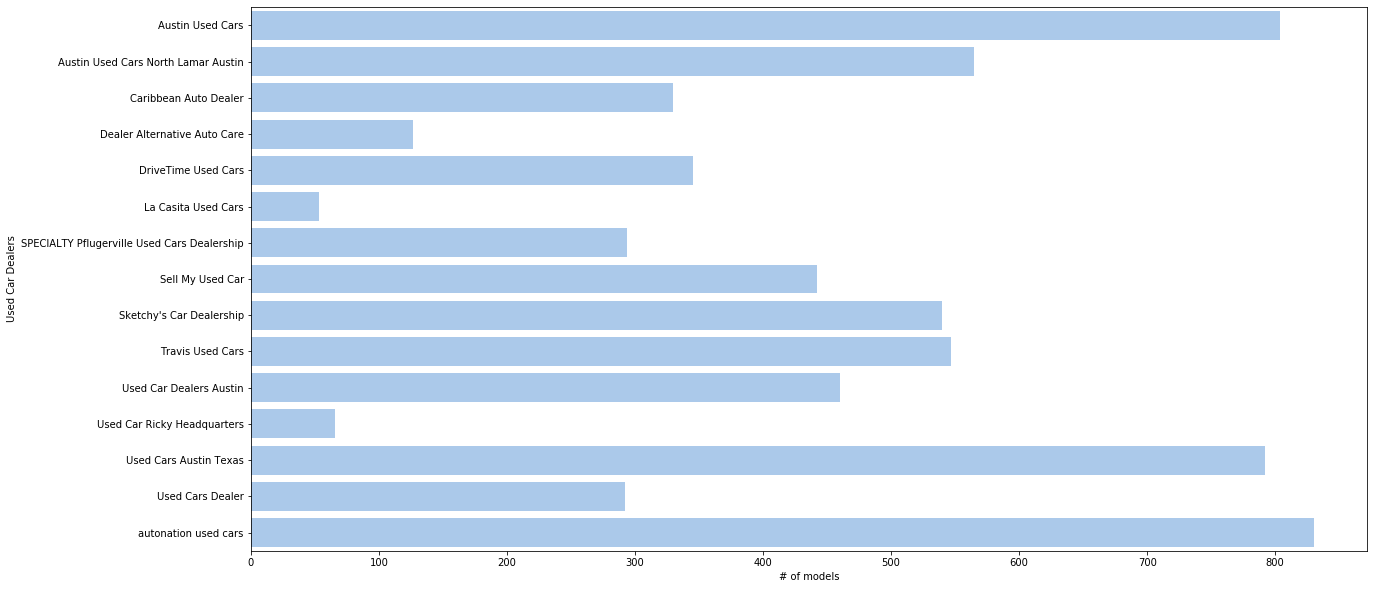

In [1172]:
plt.figure(figsize=(20,10))
sns.set_color_codes("pastel")
sns.barplot(y='Used Car Dealers', x='# of models', data=group_dealer,color="b")

In [1173]:
print('There are {} uniques models.'.format(len(venues_car_location['Model'].unique())))

There are 445 uniques models.


In [1122]:
car_onehot = pd.get_dummies(venues_car_location[['Model']], prefix="", prefix_sep="")
car_onehot['name'] = venues_car_location['name'] 

venues_car_location
fixed_columns = [car_onehot.columns[-1]] + list(car_onehot.columns[:-1])
car_onehot =car_onehot[fixed_columns]

car_onehot.head()

,name,ACURA MDX,ACURA RDX,ACURA RSX,ACURA TL,ACURA TLX,ACURA TSX,ALFA-ROMEO ROMEO,AUDI A3,AUDI A4,...,VOLVO 240,VOLVO C70,VOLVO S40,VOLVO S60,VOLVO V60,VOLVO V70,VOLVO XC,VOLVO XC60,VOLVO XC70,VOLVO XC90
0,Used Car Dealers Austin,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Used Car Dealers Austin,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Used Car Dealers Austin,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Used Car Dealers Austin,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Used Car Dealers Austin,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1123]:
car_grouped = car_onehot.groupby('name').mean().reset_index()
car_grouped

,name,ACURA MDX,ACURA RDX,ACURA RSX,ACURA TL,ACURA TLX,ACURA TSX,ALFA-ROMEO ROMEO,AUDI A3,AUDI A4,...,VOLVO 240,VOLVO C70,VOLVO S40,VOLVO S60,VOLVO V60,VOLVO V70,VOLVO XC,VOLVO XC60,VOLVO XC70,VOLVO XC90
0,Austin Used Cars,0.003731,0.000000,0.000000,0.001244,0.003731,0.002488,0.001244,0.002488,0.003731,...,0.001244,0.002488,0.000000,0.001244,0.002488,0.000000,0.001244,0.001244,0.002488,0.001244
1,Austin Used Cars North Lamar Austin,0.000000,0.001770,0.000000,0.007080,0.001770,0.003540,0.000000,0.001770,0.001770,...,0.001770,0.000000,0.000000,0.005310,0.000000,0.001770,0.000000,0.000000,0.000000,0.001770
2,Caribbean Auto Dealer,0.000000,0.000000,0.000000,0.009091,0.003030,0.000000,0.000000,0.000000,0.003030,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.003030,0.000000,0.000000,0.000000,0.003030
3,Dealer Alternative Auto Care,0.007874,0.000000,0.007874,0.000000,0.000000,0.000000,0.015748,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,DriveTime Used Cars,0.000000,0.000000,0.000000,0.011594,0.000000,0.000000,0.000000,0.000000,0.002899,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.002899,0.000000,0.000000,0.000000,0.002899
5,La Casita Used Cars,0.000000,0.000000,0.000000,0.018868,0.000000,0.037736,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.037736,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,SPECIALTY Pflugerville Used Cars Dealership,0.000000,0.000000,0.000000,0.010204,0.003401,0.000000,0.000000,0.000000,0.003401,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.003401,0.000000,0.000000,0.000000,0.003401
7,Sell My Used Car,0.000000,0.000000,0.000000,0.009050,0.002262,0.004525,0.000000,0.000000,0.002262,...,0.002262,0.000000,0.000000,0.002262,0.000000,0.004525,0.000000,0.000000,0.000000,0.004525
8,Sketchy's Car Dealership,0.001852,0.000000,0.000000,0.001852,0.003704,0.003704,0.001852,0.003704,0.005556,...,0.000000,0.003704,0.000000,0.001852,0.003704,0.000000,0.001852,0.001852,0.003704,0.001852
9,Travis Used Cars,0.001828,0.000000,0.000000,0.001828,0.003656,0.003656,0.001828,0.003656,0.005484,...,0.000000,0.003656,0.000000,0.001828,0.003656,0.000000,0.001828,0.001828,0.003656,0.001828


In [1124]:
num_top_venues =5
columns = ['Name']
indicators = ['st', 'nd', 'rd']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Vehicle Model'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Vehicle Model'.format(ind+1))
        
car_sorted = pd.DataFrame(columns=columns)
car_sorted['Name'] = car_grouped['name']

In [1125]:
for ind in car_grouped.index:
    row = car_grouped.iloc[ind][1:]
    row = row.sort_values(ascending=False)
    car_sorted.iloc[ind][1:] = row.index.values[0:5]

In [1126]:
car_sorted

,Name,1st Most Common Vehicle Model,2nd Most Common Vehicle Model,3rd Most Common Vehicle Model,4th Most Common Vehicle Model,5th Most Common Vehicle Model
0,Austin Used Cars,TOYOTA CAMRY,HONDA CIVIC,TOYOTA TACOMA,NISSAN ALTIMA,RAM 1500
1,Austin Used Cars North Lamar Austin,TOYOTA COROLLA,CHEVROLET TAHOE,BMW 3,VOLKSWAGEN TIGUAN,CHEVROLET SILVERADO
2,Caribbean Auto Dealer,RAM 2500,TOYOTA COROLLA,CHEVROLET SILVERADO,TOYOTA CAMRY,NAN TEXAS
3,Dealer Alternative Auto Care,CHEVROLET SILVERADO,JEEP WRANGLER,FORD MUSTANG,TOYOTA TACOMA,FORD F-150
4,DriveTime Used Cars,RAM 2500,CHEVROLET SILVERADO,TOYOTA COROLLA,CHEVROLET TAHOE,FORD F-150
5,La Casita Used Cars,MERCURY GRAND,RAM 1500,DODGE DURANGO,FORD F250,CHEVROLET TAHOE
6,SPECIALTY Pflugerville Used Cars Dealership,TOYOTA COROLLA,CHEVROLET SILVERADO,CHEVROLET TAHOE,TOYOTA CAMRY,FORD F-150
7,Sell My Used Car,TOYOTA COROLLA,TOYOTA CAMRY,CHEVROLET TAHOE,FORD F-150,CHEVROLET SILVERADO
8,Sketchy's Car Dealership,RAM 1500,HONDA CIVIC,TOYOTA TACOMA,FORD RANGER,HYUNDAI GENESIS
9,Travis Used Cars,RAM 1500,HONDA CIVIC,FORD RANGER,TOYOTA TACOMA,HYUNDAI SONATA


In [1127]:
group_table=car_sorted.groupby('1st Most Common Vehicle Model').count()
column_names = ['Vehicle Model','frequency'] 
comment_model = pd.DataFrame(columns=column_names)



In [1128]:
for i in group_table.index:
    Model = i
    frequency= group_table['Name'][i]
    comment_model = comment_model.append({'Vehicle Model':Model,'frequency':frequency }, ignore_index=True)

comment_model

,Vehicle Model,frequency
0,CHEVROLET SILVERADO,4
1,FORD F-250,1
2,JEEP WRANGLER,1
3,MERCURY GRAND,1
4,RAM 1500,2
5,RAM 2500,2
6,TOYOTA CAMRY,1
7,TOYOTA COROLLA,3


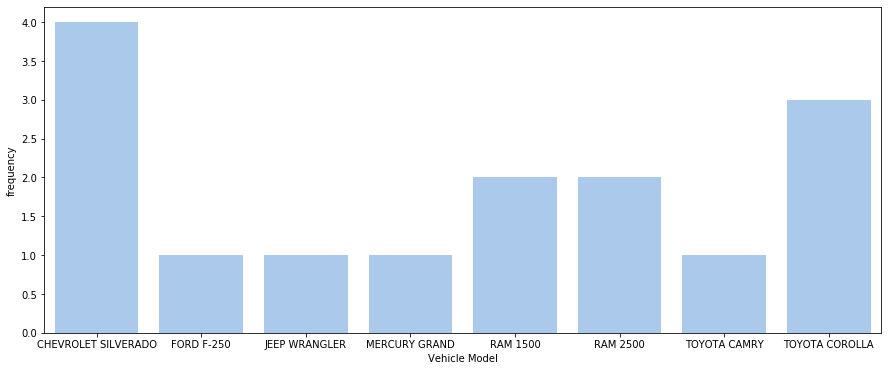

In [1129]:
plt.figure(figsize=(15,6))
sns.set_color_codes("pastel")
sns.barplot(x='Vehicle Model', y='frequency', data=comment_model,color="b")

### Run k-means to cluster the dealer into 3 clusters.
(As we only have 15 dealers, it is not reasonable to cluster the dearler, the result of thi section won't show in the report. Just for practicing)

In [1130]:
from sklearn.cluster import KMeans
kclusters = 3

dealer_grouped_clustering = car_grouped.drop('name', 1)
dealer_grouped_clustering 

,ACURA MDX,ACURA RDX,ACURA RSX,ACURA TL,ACURA TLX,ACURA TSX,ALFA-ROMEO ROMEO,AUDI A3,AUDI A4,AUDI A5,...,VOLVO 240,VOLVO C70,VOLVO S40,VOLVO S60,VOLVO V60,VOLVO V70,VOLVO XC,VOLVO XC60,VOLVO XC70,VOLVO XC90
0,0.003731,0.000000,0.000000,0.001244,0.003731,0.002488,0.001244,0.002488,0.003731,0.002488,...,0.001244,0.002488,0.000000,0.001244,0.002488,0.000000,0.001244,0.001244,0.002488,0.001244
1,0.000000,0.001770,0.000000,0.007080,0.001770,0.003540,0.000000,0.001770,0.001770,0.001770,...,0.001770,0.000000,0.000000,0.005310,0.000000,0.001770,0.000000,0.000000,0.000000,0.001770
2,0.000000,0.000000,0.000000,0.009091,0.003030,0.000000,0.000000,0.000000,0.003030,0.003030,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.003030,0.000000,0.000000,0.000000,0.003030
3,0.007874,0.000000,0.007874,0.000000,0.000000,0.000000,0.015748,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.011594,0.000000,0.000000,0.000000,0.000000,0.002899,0.002899,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.002899,0.000000,0.000000,0.000000,0.002899
5,0.000000,0.000000,0.000000,0.018868,0.000000,0.037736,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.037736,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.010204,0.003401,0.000000,0.000000,0.000000,0.003401,0.003401,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.003401,0.000000,0.000000,0.000000,0.003401
7,0.000000,0.000000,0.000000,0.009050,0.002262,0.004525,0.000000,0.000000,0.002262,0.002262,...,0.002262,0.000000,0.000000,0.002262,0.000000,0.004525,0.000000,0.000000,0.000000,0.004525
8,0.001852,0.000000,0.000000,0.001852,0.003704,0.003704,0.001852,0.003704,0.005556,0.003704,...,0.000000,0.003704,0.000000,0.001852,0.003704,0.000000,0.001852,0.001852,0.003704,0.001852
9,0.001828,0.000000,0.000000,0.001828,0.003656,0.003656,0.001828,0.003656,0.005484,0.003656,...,0.000000,0.003656,0.000000,0.001828,0.003656,0.000000,0.001828,0.001828,0.003656,0.001828


In [1131]:
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(dealer_grouped_clustering)


kmeans.labels_[0:10] 


car_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [1132]:
dealer_info = dataframe_filtered[['name','address', 'postalCode', 'city','lat','lng']]
dealer_merged = dealer_info.join(car_sorted.set_index('Name'), on='name')
dealer_merged 

,name,address,postalCode,city,lat,lng,Cluster Labels,1st Most Common Vehicle Model,2nd Most Common Vehicle Model,3rd Most Common Vehicle Model,4th Most Common Vehicle Model,5th Most Common Vehicle Model
0,Used Car Dealers Austin,6825 E Highway 290 #B,78723,Austin,30.320618,-97.688241,0,CHEVROLET SILVERADO,CHEVROLET TAHOE,VOLKSWAGEN TIGUAN,TOYOTA CAMRY,VOLKSWAGEN PASSAT
1,Used Cars Dealer,Third Coast Auto Group 1930 Kyle Crossing,78640,Kyle,30.016762,-97.859177,2,FORD F-250,RAM 2500,FORD F-150,FORD F-350,RAM 3500
2,SPECIALTY Pflugerville Used Cars Dealership,15505 Interstate 35,78660,Pflugerville,30.449940,-97.666000,0,TOYOTA COROLLA,CHEVROLET SILVERADO,CHEVROLET TAHOE,TOYOTA CAMRY,FORD F-150
3,Used Cars Austin Texas,5410 Airport Blvd,78751,Austin,30.316262,-97.714484,0,CHEVROLET SILVERADO,GMC SIERRA,CHEVROLET TAHOE,RAM 1500,HONDA CIVIC
4,Travis Used Cars,6114 E Riverside Dr,78741,Austin,30.226184,-97.704906,0,RAM 1500,HONDA CIVIC,FORD RANGER,TOYOTA TACOMA,HYUNDAI SONATA
5,Sketchy's Car Dealership,701 Montopolis Dr,78741,Austin,30.237165,-97.695183,0,RAM 1500,HONDA CIVIC,TOYOTA TACOMA,FORD RANGER,HYUNDAI GENESIS
6,Austin Used Cars,4430 Manchaca Rd,78745,Austin,30.228870,-97.789641,0,TOYOTA CAMRY,HONDA CIVIC,TOYOTA TACOMA,NISSAN ALTIMA,RAM 1500
7,Sell My Used Car,12312 Blue Water Dr,78758,Austin,30.405955,-97.682195,0,TOYOTA COROLLA,TOYOTA CAMRY,CHEVROLET TAHOE,FORD F-150,CHEVROLET SILVERADO
8,Austin Used Cars North Lamar Austin,10625 N Lamar Blvd,78753,Austin,30.375484,-97.689438,0,TOYOTA COROLLA,CHEVROLET TAHOE,BMW 3,VOLKSWAGEN TIGUAN,CHEVROLET SILVERADO
9,autonation used cars,NaN,78759,Austin,30.410687,-97.746155,0,JEEP WRANGLER,CHEVROLET SILVERADO,ROVER SPORT,MERCEDES-BENZ S-CLASS,AUDI Q5


In [1116]:
import matplotlib.cm as cm
import matplotlib.colors as colors

address = '1100 Congress Ave, Austin, TX'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)


# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(dealer_merged['lat'], dealer_merged['lng'], dealer_merged['name'], dealer_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [1137]:
from sklearn import preprocessing
dealer_model = dealer_merged [['name','lat','lng','1st Most Common Vehicle Model']]
le = preprocessing.LabelEncoder()
dealer_model[['1st Most Common Vehicle Model code']] = dealer_model[['1st Most Common Vehicle Model']].apply(le.fit_transform)
dealer_model

/Users/zhangmengxuan/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,name,lat,lng,1st Most Common Vehicle Model,1st Most Common Vehicle Model code
0,Used Car Dealers Austin,30.320618,-97.688241,CHEVROLET SILVERADO,0
1,Used Cars Dealer,30.016762,-97.859177,FORD F-250,1
2,SPECIALTY Pflugerville Used Cars Dealership,30.449940,-97.666000,TOYOTA COROLLA,7
3,Used Cars Austin Texas,30.316262,-97.714484,CHEVROLET SILVERADO,0
4,Travis Used Cars,30.226184,-97.704906,RAM 1500,4
5,Sketchy's Car Dealership,30.237165,-97.695183,RAM 1500,4
6,Austin Used Cars,30.228870,-97.789641,TOYOTA CAMRY,6
7,Sell My Used Car,30.405955,-97.682195,TOYOTA COROLLA,7
8,Austin Used Cars North Lamar Austin,30.375484,-97.689438,TOYOTA COROLLA,7
9,autonation used cars,30.410687,-97.746155,JEEP WRANGLER,2


In [1142]:
import matplotlib.cm as cm
import matplotlib.colors as colors

address = '1100 Congress Ave, Austin, TX'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)


# set color scheme for the clusters
x = np.arange(8)
ys = [i + x + (i*x)**2 for i in range(8)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, model, code in zip(dealer_model['lat'], dealer_model['lng'], dealer_model['name'], dealer_model['1st Most Common Vehicle Model'],dealer_model['1st Most Common Vehicle Model code']):
    label = folium.Popup(str(poi) + '  ' + str(model), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[code-1],
        fill=True,
        fill_color=rainbow[code-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Predict used car price 

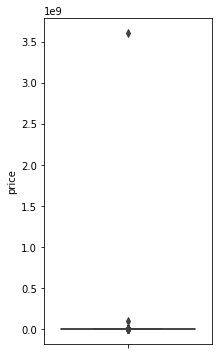

In [1098]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

TxCar = car.query('state == "tx"').copy().reset_index(drop=True)
plt.figure(figsize=(3,6))
sns.boxplot( y='price', data=TxCar,showfliers=True);

In [1099]:
TxCar['price'].describe()

count    2.485600e+04
mean     1.662455e+05
std      2.293942e+07
min      0.000000e+00
25%      4.950000e+03
50%      1.299500e+04
75%      2.490000e+04
max      3.615215e+09
Name: price, dtype: float64

In [1100]:
np.percentile(TxCar['price'],99)

59995.0

In [1101]:
TxCar['price'].describe()


count    2.485600e+04
mean     1.662455e+05
std      2.293942e+07
min      0.000000e+00
25%      4.950000e+03
50%      1.299500e+04
75%      2.490000e+04
max      3.615215e+09
Name: price, dtype: float64

In [1102]:
TxCar = TxCar.query("price >1000 and price <60000 and year>=1990 and year<2021  and cylinders!='other' and transmission !='other'and fuel !='other' and odometer>500 and odometer< 250000 ").copy().reset_index(drop=True)
TxCar.drop([ 'lat','long','id','url','region_url', 'VIN', 'image_url', 'description','drive','size',
            'type','paint_color','posting_date','region'], axis=1, inplace=True)
TxCar

,Unnamed: 0,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,state
0,369887,3800,2007.0,pontiac,g6,good,6 cylinders,gas,71000.0,clean,automatic,tx
1,369888,5200,2013.0,dodge,avenger sxt,excellent,4 cylinders,gas,63000.0,clean,automatic,tx
2,369889,2895,2007.0,mazda,3 i,fair,4 cylinders,gas,151300.0,clean,manual,tx
3,369890,8100,2013.0,honda,civic,good,4 cylinders,gas,64370.0,clean,automatic,tx
4,369891,16995,2001.0,ford,f-350 4x4 lariat diesel,NaN,NaN,diesel,228954.0,clean,automatic,tx
...,...,...,...,...,...,...,...,...,...,...,...,...
15237,457357,18900,2016.0,dodge,promaster 2500,excellent,NaN,gas,92000.0,clean,automatic,tx
15238,457358,24950,2017.0,gmc,acadia denali,NaN,NaN,gas,61227.0,clean,automatic,tx
15239,457359,58950,2019.0,ford,f250 platinum 4x4,NaN,NaN,diesel,81127.0,clean,automatic,tx
15240,457360,15988,2017.0,hyundai,santa fe,like new,NaN,gas,66300.0,clean,automatic,tx


In [1103]:
TxCar['odometer'].describe()

count     15242.000000
mean      98988.720444
std       56722.959202
min         600.000000
25%       53000.000000
50%       94816.500000
75%      138997.500000
max      249877.000000
Name: odometer, dtype: float64

In [1104]:
np.percentile(TxCar['odometer'],99)

231628.95000000013

### Remove NaN in the data and check the price

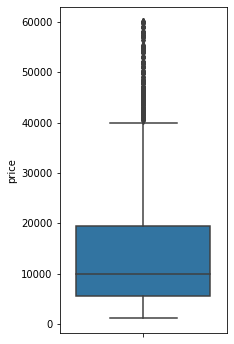

In [1105]:
TxCarData =TxCar.dropna()

plt.figure(figsize=(3,6))
sns.boxplot( y='price', data=TxCarData,showfliers=True)

### Check distribution of predictors with respect to price

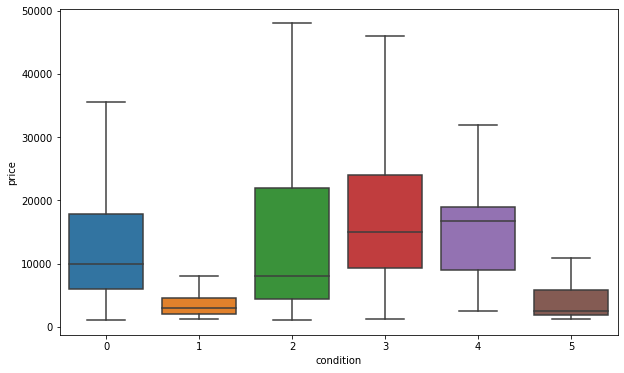

In [1113]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(x = 'condition', y='price', data=TxCarData,showfliers=False)



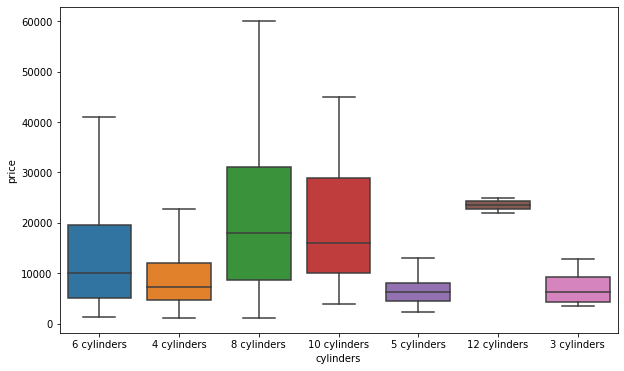

In [1107]:
plt.figure(figsize=(10,6))
sns.boxplot(x = 'cylinders', y='price', data=TxCarData,showfliers=False);


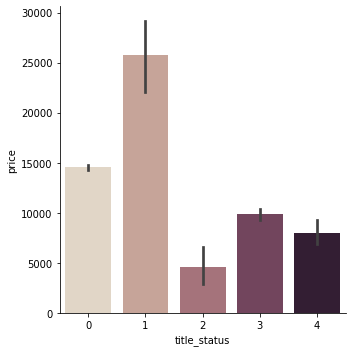

In [1112]:
sns.catplot(x="title_status", y="price",kind="bar", palette="ch:.25", data=TxCarData)

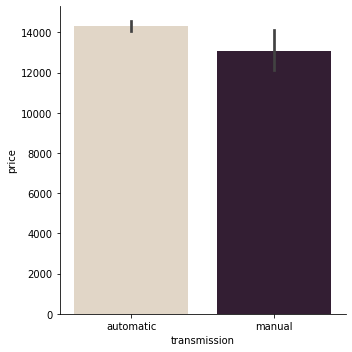

In [1109]:
sns.catplot(x="transmission", y="price",kind="bar", palette="ch:.25", data=TxCarData)

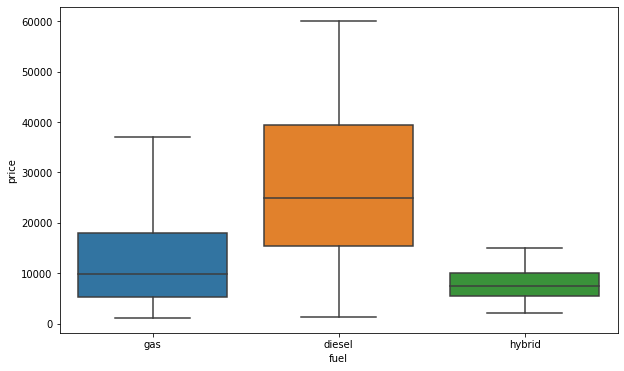

In [1110]:
plt.figure(figsize=(10,6))
sns.boxplot(x = 'fuel', y='price', data=TxCarData,showfliers=False);

### Apply Label Encoder to transfer categorical variables to numbers

In [1059]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
TxCarData["odometer"] = np.sqrt(preprocessing.minmax_scale(TxCarData["odometer"]))
#TxCarData["year"] = np.sqrt(preprocessing.minmax_scale(TxCarData["year"]))
#TxCarData["model"] = np.sqrt(preprocessing.minmax_scale(TxCarData["model"]))

TxCarData['cylinders number'] = TxCarData['cylinders'].apply(lambda x: int(x.split()[0]))

/Users/zhangmengxuan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/zhangmengxuan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [1111]:
le = preprocessing.LabelEncoder()
TxCarData[['manufacturer','model','fuel','title_status'
           ,'transmission', 'condition']] = TxCarData[['manufacturer','model','fuel','title_status','transmission','condition']].apply(le.fit_transform)

/Users/zhangmengxuan/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [1061]:

TxCarData

,Unnamed: 0,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,state,cylinders number
0,369887,3800,2007.0,26,1005,2,6 cylinders,1,0.531429,0,0,tx,6
1,369888,5200,2013.0,7,315,0,4 cylinders,1,0.500324,0,0,tx,4
2,369889,2895,2007.0,20,62,1,4 cylinders,1,0.777527,0,1,tx,4
3,369890,8100,2013.0,12,481,2,4 cylinders,1,0.505786,0,0,tx,4
7,369894,15000,2009.0,10,1615,0,8 cylinders,1,0.457609,0,0,tx,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15226,457334,9900,2008.0,5,1631,0,8 cylinders,1,0.782695,0,0,tx,8
15228,457343,31990,2018.0,5,1649,2,6 cylinders,1,0.152260,0,0,tx,6
15231,457347,9900,2011.0,10,2040,0,8 cylinders,1,0.894379,0,0,tx,8
15232,457349,30990,2015.0,5,1649,2,6 cylinders,1,0.142417,0,0,tx,6


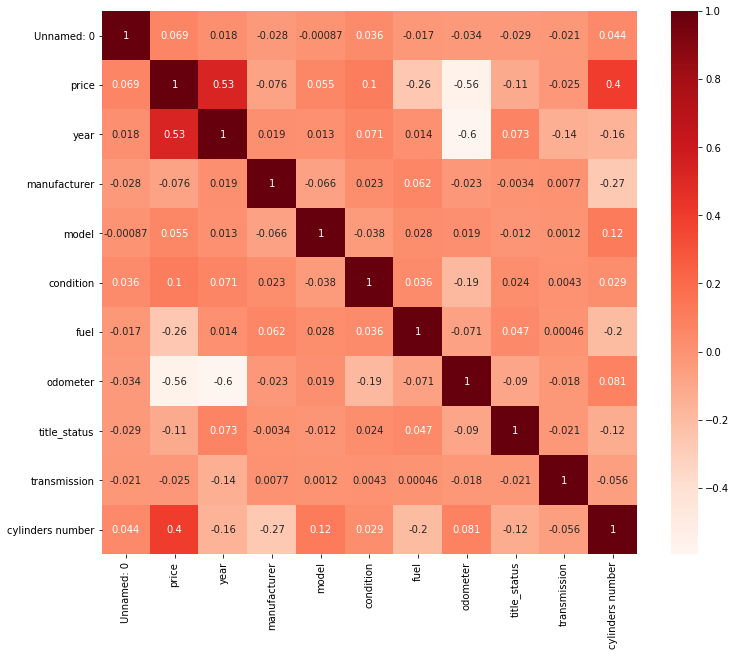

In [1062]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = TxCarData.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [993]:
print(TxCarData[["year","odometer"]].corr())

              year  odometer
year      1.000000 -0.597944
odometer -0.597944  1.000000


In [994]:
X =  TxCarData[['year','condition','cylinders number','fuel', 'title_status']]

y = TxCarData[["price"]]

In [995]:
 X.corr()


,year,condition,cylinders number,fuel,title_status
year,1.000000,0.072026,-0.156264,0.012690,0.075958
condition,0.072026,1.000000,0.028491,0.036515,0.023886
cylinders number,-0.156264,0.028491,1.000000,-0.199755,-0.125281
fuel,0.012690,0.036515,-0.199755,1.000000,0.046953
title_status,0.075958,0.023886,-0.125281,0.046953,1.000000


## Build Model 
### We will use 20% of the data as test set, and 80% of the data to train the model

In [1068]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
X_train

,year,condition,cylinders number,fuel,title_status
8531,2003.0,2,6,0,0
8560,2013.0,0,4,1,0
2698,2004.0,0,6,1,0
7778,2014.0,0,4,1,0
213,2013.0,3,8,1,0
...,...,...,...,...,...
9624,2013.0,0,6,1,0
6610,2007.0,2,6,1,3
3259,2014.0,0,4,1,0
5634,2020.0,3,6,1,4


In [1069]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn import linear_model


In [1072]:
reg_ln = linear_model.LinearRegression()
reg_ln.fit(X_train, y_train)
#outputs the coefficients
print('Intercept :', reg_ln.intercept_, '\n')
print(pd.DataFrame({'features':pd.DataFrame(X_train).columns,'coeficients':reg_ln.coef_}))

Intercept : -2484668.994118695 

           features  coeficients
0              year  1236.818162
1         condition   535.031558
2  cylinders number  3163.437619
3              fuel -8209.308430
4      title_status -1254.555871


In [1073]:
y_hat = reg_ln.predict(X_test)


In [1074]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_hat))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_hat))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_hat)))
print( 'R2: ', r2_score(y_test, y_hat) )


Mean Absolute Error: 5682.121491200569
Mean Squared Error: 56566562.60643966
Root Mean Squared Error: 7521.0745646110745
R2:  0.577405060479051


In [1075]:
import statsmodels.api as sm
X_1 = sm.add_constant(X_train)
X_1
#Fitting sm.OLS model
model = sm.OLS(y_train,X_1).fit()
model.pvalues

const               0.000000e+00
year                0.000000e+00
condition           2.991914e-11
cylinders number    0.000000e+00
fuel                3.333057e-90
title_status        2.015887e-28
dtype: float64

In [1078]:
reg_ln = linear_model.LinearRegression()
reg_ln.fit(X, y)
#outputs the coefficients
print('Intercept :', reg_ln.intercept_, '\n')
print(pd.DataFrame({'features':pd.DataFrame(X_train).columns,'coeficients':reg_ln.coef_}))

Intercept : -2490720.4063493777 

           features  coeficients
0              year  1239.997514
1         condition   534.499028
2  cylinders number  3133.829296
3              fuel -8417.258158
4      title_status -1288.306853


In [1079]:
X_2 = sm.add_constant(X)
X_2
#Fitting sm.OLS model
model = sm.OLS(y,X_2).fit()
model.pvalues

const                0.000000e+00
year                 0.000000e+00
condition            8.823799e-14
cylinders number     0.000000e+00
fuel                1.463669e-117
title_status         5.107317e-36
dtype: float64

In [1082]:
year_price= TxCarData[['year','price']]

year_price=year_price.groupby('year').mean()

year =list( year_price.index )
price =year_price['price']


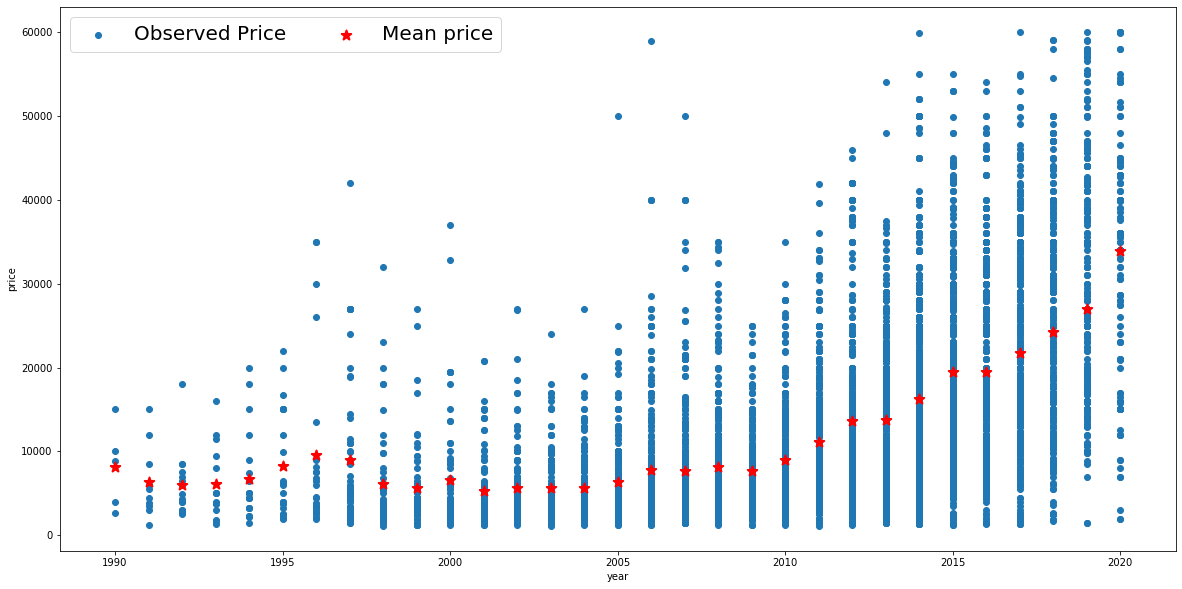

In [1094]:
plt.figure(figsize=(20,10))
y = TxCarData['price']
x = TxCarData['year']
price_plt=plt.scatter(x, y)
mean_plt=plt.scatter(year, price, marker='*' ,linewidths=2, c='red', s=100)

plt.legend((price_plt, mean_plt),
           ('Observed Price', 'Mean price'),
           scatterpoints=1,
           loc='upper left',
           ncol=3,
           fontsize=20)
plt.xlabel('year')
plt.ylabel('price')
plt.show()

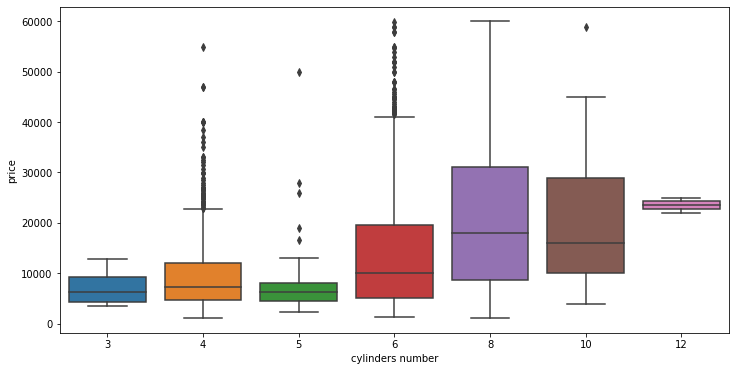

In [1090]:
plt.figure(figsize=(12,6))
sns.boxplot(x="cylinders number", y="price", data=TxCarData)